# Midterm

### Question 1


import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
np.random.RandomState(0)
import pandas as pd

prepare data and label name variables

In [2]:
xlabel = "Smoking %"
ylabel = "Lung Cancer per 100,000 people"

t = list(range(1999,2009))
x = [23.3, 23.1, 22.6, 22.3, 21.5, 20.8, 20, 19.2, 18.6, 18]
y = [93.5, 91.5, 91, 89.7, 89.3, 87.8, 86.6, 84.2, 83, 81.4]

x = np.array(x)
y = np.array(y)

### Question 1a

In [3]:
def get_m_b_r2(x, y):
    sum_x = x.sum()
    sum_y = y.sum()
    sum_xy = (x*y).sum()
    sum_x_squared = (x**2).sum()
    sum_y_squared = (y**2).sum()
    n = x.shape[0]

    b = (sum_y * sum_x_squared - sum_x * sum_xy) / (n * sum_x_squared  - sum_x**2)

    m = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x**2)

    r_squared = ((n * sum_xy - sum_x * sum_y)**2) / ((n * sum_x_squared - sum_x**2) * (n * sum_y_squared - sum_y**2))

    return m, b, r_squared

m, b, r_squared = get_m_b_r2(x,y)

print(f'm = {m}; b = {b}; r-squared = {r_squared}')

m = 2.0365016263101556; b = 45.155655945064865; r-squared = 0.9788757461691334


In [4]:
def get_y(x_new, m=m, b=b):
    return m*x_new + b
    
def plot(x, y, line_only = False, line_label = 'best fit'):
    if not line_only:
        plt.scatter(x, y)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)

    m, b, r_squared = get_m_b_r2(x, y)

    x1 = np.array([x.min()-1,x.max()+1])
    y1 = get_y(x1, m, b)

    plt.plot(x1, y1, label=f'{line_label}, y = {m:.2f}*x + {b:.2f}; $r^2$={r_squared:.3f}', ls='--')
    plt.legend();

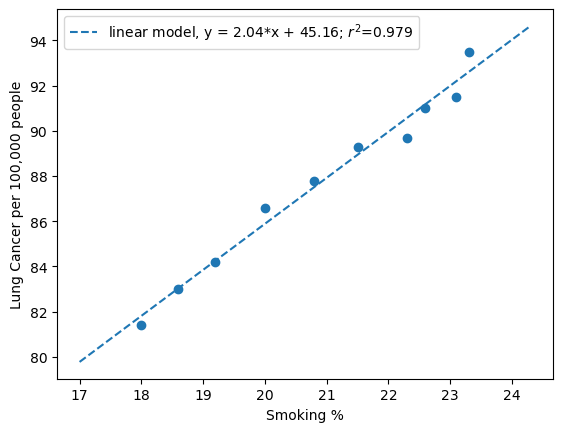

In [5]:
# def plot(m,b, line_name):
#     plt.plot(x, m*x+b, label=f'{line_name} y = {m:.3f}*x + {b:.3f}')

plot(x, y, line_label='linear model')
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.legend();

### Question 1B

In [6]:
x_predict = 24
y_predict = m*x_predict + b

print(f'For {x_predict}% smoking rate, the lung cancer rate per 100,000 people is {y_predict}')

For 24% smoking rate, the lung cancer rate per 100,000 people is 94.0316949765086


### Question 1C

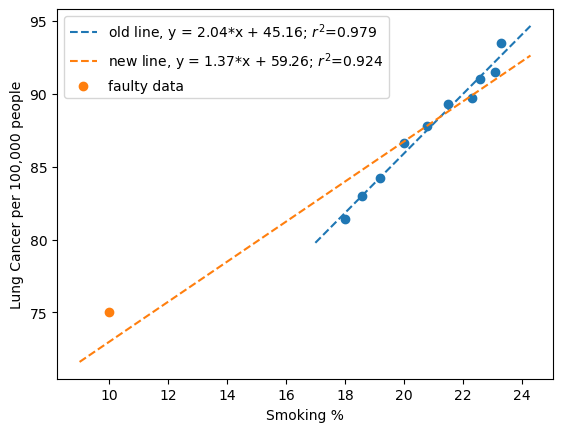

In [7]:
faulty_point = (10, 75)

x_with_faulty = np.append(x, faulty_point[0])
y_with_faulty = np.append(y, faulty_point[1])

plot(x,y, line_label='old line')
plot(x_with_faulty, y_with_faulty, line_only=True, line_label="new line")
plt.scatter(faulty_point[0], faulty_point[1], label='faulty data')
plt.legend();

R-squared tells us how much the linear model fits the data provided. After adding the faulty data point (10,75), the r-squared value decreased from 0.979 to 0.924 i.e. the new model is not fitting all the data points as well as the old model. Thus, the data point looks like an outlier and we may remove it (but we keep it stored until we get more data points improve the r-square value). For any prediction, we will use the old model as it is better.

### Question 2

The minimum of -f(x,y) is the maximum of the original function. So $ F = -(3 + x^2 + y^2)^{-1}$

dF/dx = $(-1) \times -(3+x^2 + y^2)^{-2} \times (2x) = 2x \times (3+x^2 + y^2)^{-2} $  
dF/dy = $(-1) \times -(3+x^2 + y^2)^{-2} \times (2y) = 2y \times (3+x^2 + y^2)^{-2} $  

In [8]:
def f(x,y):
    return -1 * ((3 + (x**2) + (y**2))**-1)

def dfdx (x,y):
    return (2*x) * ((3 + (x**2) + (y**2))**-2)

def dfdy (x,y):
    return (2*y) * ((3 + (x**2) + (y**2))**-2)

In [9]:
def gradient_descent(x_curr, y_curr, learning_rate):
    x_new = x_curr - learning_rate * dfdx(x_curr, y_curr)
    y_new = y_curr - learning_rate * dfdy(x_curr, y_curr)

    return x_new, y_new

In [10]:
def is_similar(new, old, precision = 1e-10):
    return abs(new - old) < precision

The code below does the following:
1. create neccessary functions
2. initialize 10 random x,y values, 
3. run gradient descent to the local minimas and calculate their F(x,y) values
4. report only that which provides the least F value

In [11]:
def find_min(x, y, rate):
    for i in range(10000):
        x_new, y_new = gradient_descent(x, y, rate)

        if is_similar(x_new, x) and is_similar(y_new, y):
            # print('Getting similar values, thus breaking loop at iteration = ', i)
            break

        x, y = x_new, y_new

    return x,y

In [12]:
initial_x_values = -10 + 20*np.random.rand(10)
initial_y_values = -10 + 20*np.random.rand(10)

f_values = []
final_xy = []

rate = 0.01

for x,y in zip(initial_x_values, initial_y_values):
    x, y = find_min(x,y, rate)

    final_xy.append((x,y))
    f_values.append(f(x,y))

In [13]:
min_idx = np.argmin(f_values)
print(f'for (x,y) = {final_xy[min_idx]}, the minimum F is {f_values[min_idx]}, i.e. max f is {f_values[min_idx]*-1}')

for (x,y) = (4.490452421574734e-08, -1.7450220055514157e-08), the minimum F is -0.33333333333333304, i.e. max f is 0.33333333333333304


### Question 3


In [14]:
# read table (make sure temp.csv file is in same folder as notebook)
df = pd.read_csv('temp.csv')

In [15]:
# get temps between 1850 and 2013
df1 = df[(df.year >= 1850) & (df.year <= 2013)]

In [16]:
# check which countries have the city London. We find that London is also in Canada so will remove it
df.query('city == "London"').country.unique()

array(['Canada', 'United Kingdom'], dtype=object)

In [17]:
# find only selected cities and leave out any cities from Canada
df2 = df1[df1.city.isin(['Global','London', 'Mexicali', 'Rio De Janeiro']) & ~(df1.country == "Canada")]

In [18]:
df2.isna().sum()
# check number of missing values

year        0
city        0
country     0
avg_temp    1
dtype: int64

In [19]:
df3 = df2.fillna(method='pad')
# fill in missing values

In [20]:
# pivot the data to prepare for correlation
city_temps = df3.pivot_table(index='year', columns='city', values='avg_temp')

In [21]:
# check basic correlation across cities
city_temps.corr()

city,Global,London,Mexicali,Rio De Janeiro
city,,,,
Global,1.000000,0.577677,0.509603,0.770625
London,0.577677,1.000000,0.282479,0.398928
Mexicali,0.509603,0.282479,1.000000,0.462105
Rio De Janeiro,0.770625,0.398928,0.462105,1.000000


In [22]:
# take rolling mean and check correlation across cities
city_temps.rolling(5, center=True).agg('mean').corr()

city,Global,London,Mexicali,Rio De Janeiro
city,,,,
Global,1.000000,0.846390,0.697025,0.927505
London,0.846390,1.000000,0.645850,0.739153
Mexicali,0.697025,0.645850,1.000000,0.682654
Rio De Janeiro,0.927505,0.739153,0.682654,1.000000


**answer** Average temperatures of Rio De Janeiro is highly correlated with the global over the years from 1850 to 2013. This is because the correlation coefficient for global and Rio De Janeiro is highest in both tables (average and rolling average) compared to cities with the global.